**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 9**
Regresión Logística

---

*   NOMBRE Y MATRÍCULA:
    * A01746998 - Alexys Martin Coate Reyes                            
    * A01796517 - Jonathan Levi Marquez García
    * A01796489 - Anrulfo Alejandro Cavazos Villareal

In [990]:
#from google.colab import drive
#drive.mount('/content/drive')

In [991]:
import os
#DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 9/Actividad9_RLog"
#os.chdir(DIR)

In [992]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [993]:
data_df = pd.read_csv('data.csv')
data_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# **Parte 1**. EDA

Haz que el `id` sea el índice del dataframe y efectúa una exploración inicial de los datos a través de: 

In [994]:
data_df.set_index('id', inplace=True)
data_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820




1a) Estadísticas descriptivas para todas las variables del dataframe. 

#### **Estafísticas descriptivas - Variables Numéricas**

In [995]:
data_df.describe(include="number")

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


#### **Estafísticas descriptivas - Variables Categóricas**

In [996]:
data_df.describe(exclude="number")

,diagnosis
count,569
unique,2
top,B
freq,357


1b) Valores únicos por variable para identificar posibles variables categóricas. 

In [997]:
# Imprimiendo cantidad de valores únicos por columa
data_df.nunique().to_frame("Number of unique values per column")

,Number of unique values per column
diagnosis,2
radius_mean,456
texture_mean,479
perimeter_mean,522
area_mean,539
smoothness_mean,474
compactness_mean,537
concavity_mean,537
concave points_mean,542
symmetry_mean,432


1c) Búsqueda de valores faltantes.

In [998]:
# Devuelve un booleano "True" si hay información nula en la celda del data frame
null_bool_df = data_df.isnull()
null_bool_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
842517,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
84300903,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
84348301,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
84358402,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
926682,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
926954,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [999]:
# Devuelve True si hay un valor nulo en esa columna
null_bool_columns = data_df.isnull().any()
null_bool_columns.to_frame()

,0
diagnosis,False
radius_mean,False
texture_mean,False
perimeter_mean,False
area_mean,False
smoothness_mean,False
compactness_mean,False
concavity_mean,False
concave points_mean,False
symmetry_mean,False


In [1000]:
# Devuelve "True" si alguna celda del data frame tiene un valor nulo
null_bool_table = data_df.isnull().any().any()
null_bool_table

np.False_

> * * *
> ### **Respuesta**
> `null_bool_table`: Como la respuesta final es false, significa que no hay valores nulos en todo el data frame.
> * * *

1d) Diagrama de barras para determinar la frecuencia de los diagnósticos (cantidad de observaciones con resultado benigno y maligno) 

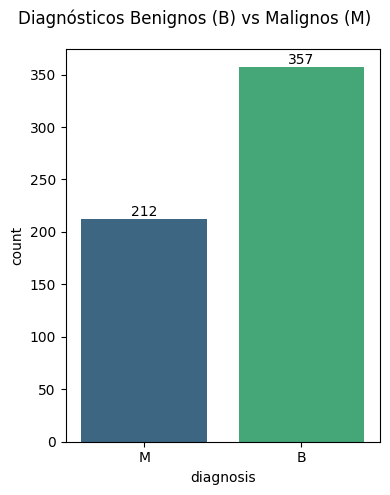

In [1001]:
# Creando Gráfica
fig = plt.figure(figsize=(4,5)) 
ax = sns.countplot(data=data_df, x="diagnosis", hue="diagnosis", palette="viridis", legend=False)

# Títulos y distribución
fig.suptitle("Diagnósticos Benignos (B) vs Malignos (M)")
fig.tight_layout()

# Añadir etiquetas de conteo encima de cada barra
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 3, 
            int(p.get_height()), 
            ha='center', 
            fontsize=10)

2. Como hay tres valores relacionados con la misma característica (`mean`, `se` y `worst`) es muy probable que exista multicolinealidad en el conjunto. 

La multicolinealidad en regresión es una condición que ocurre cuando algunas variables predictoras están fuertemente correlacionadas entre sí, de tal manera que si se incluyen simultáneamente en un modelo, impiden explicar de manera correcta el efecto que cada una tiene sobre la variable respuesta. Existen muchas formas de analizar si hay colinealidad en los modelos, una de ellas es el alto coeficiente de correlación entre variables.
 
Para observar este efecto, elabora un mapa de calor que cuantifique la correlación de las variables numéricas en el dataframe. 

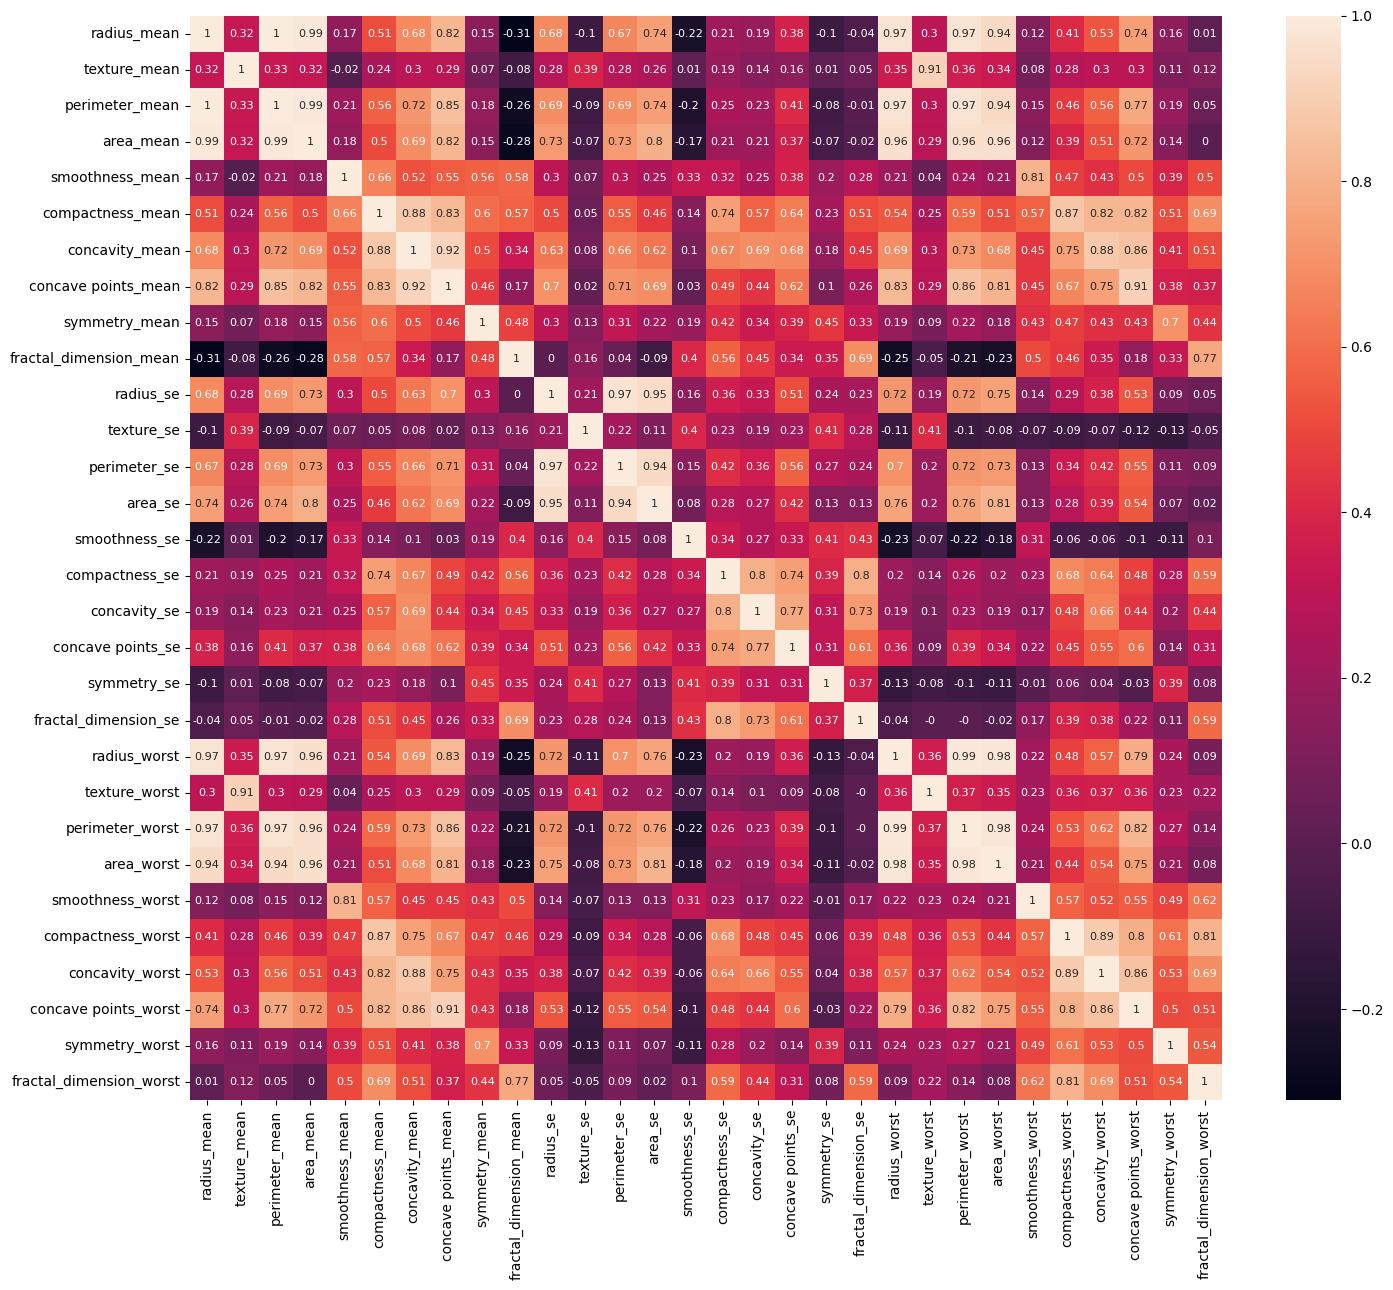

In [1002]:
fig = plt.figure(figsize=(15, 13))
corr_map = round(data_df.corr(numeric_only=True), 2)
ax = sns.heatmap(corr_map, annot=True, annot_kws={"fontsize": 8})
fig.tight_layout()

Si te fijas en los valores de correlación entre las variables `_mean` y `_worst` es evidente la multicolinearidad. 

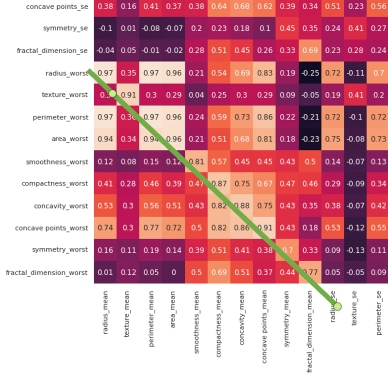

Por ejemplo, la columna `radius_mean` tiene una correlación de 0.97 con la columna `radius_worst`. Esto es algo inevitable, porque las columnas "peores" son esencialmente solo un subconjunto de las columnas "medias". 
 
Para solucionar el problema numérico de la multicolinealidad, tradicionalmente se recurre a eliminar variables o efectuar análisis de componentes principales (PCA) con las `X`’s y usar los componentes como variables independientes en un modelo final.
 
Conduciremos esta actividad en esos dos sentidos.


# **Parte 2**. Modelo con eliminación de variables altamente correlacionadas  

Elimina las variables altamente correlacionadas:

3a) Ahora que sabes que las variables `_mean` y `_worst` tienen correlación alta, hay que quitar del dataframe un conjunto. Borra las columnas `_worst`.

In [1003]:
# Lista de columnas del data frame
columns = data_df.columns.to_list()

# Elabora una lista de las columnas que contienen la parabra "worst" o "mean"
cols_to_erase = [col for col in columns if (col.find("worst") != -1) ]
print(len(cols_to_erase), " Columnas a eliminar")
cols_to_erase

10  Columnas a eliminar


['radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [1004]:
# Data frame sin las columnas de worst
data_df.drop(cols_to_erase, axis=1, inplace=True)
data_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892


3b. Entre las variables `_mean`, identifica patrones lineales con diagramas de dispersión usando:



```Python
sns.pairplot(data=data_df[['radius_mean', 
        'texture_mean', 
        'perimeter_mean', 
        'area_mean', 
        'smoothness_mean', 
        'compactness_mean', 
        'concavity_mean',
        'concave points_mean', 
        'symmetry_mean', 
        'fractal_dimension_mean']]) 
```




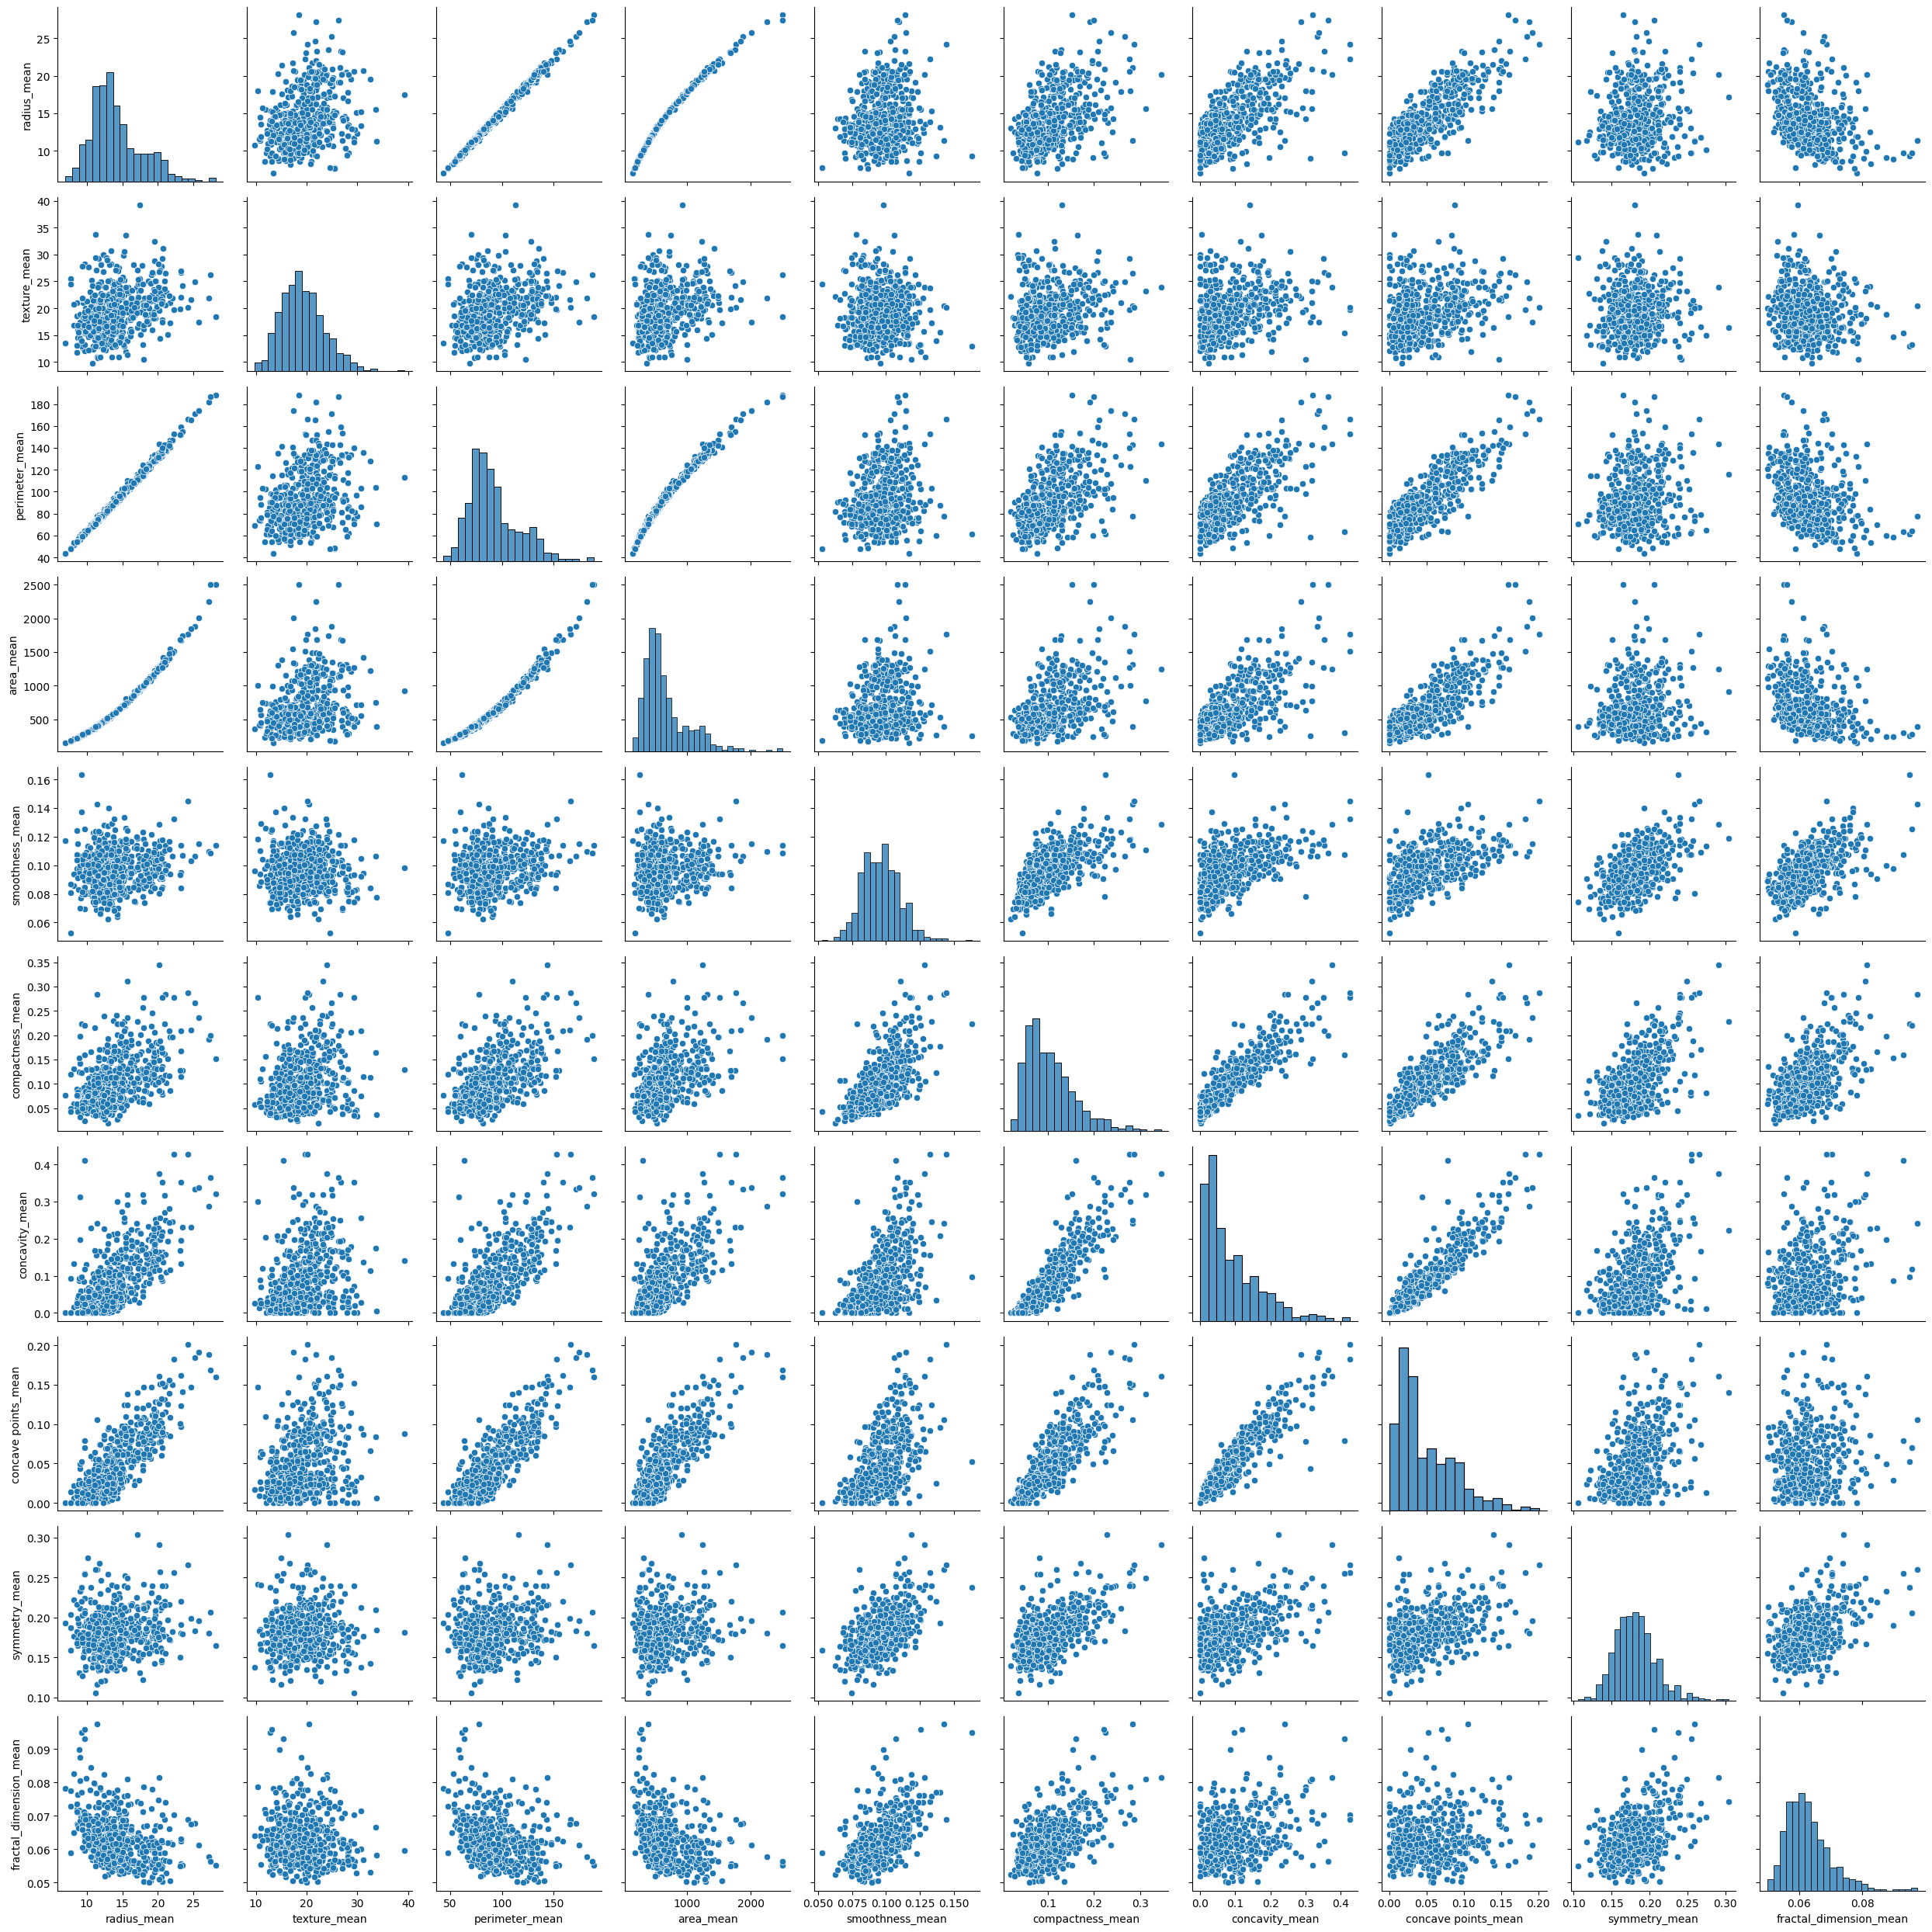

In [1005]:
ax = sns.pairplot(data=data_df[['radius_mean', 'texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean']])
plt.tight_layout()

De la matriz podrás observar relaciones lineales bastante evidentes entre:


*   `radius_mean`, `perimeter_mean` y `area_mean`
*   `compactness_mean`, `concavity_mean`, `concave_points_mean`
 
Sabemos que el perímetro y el área de un círculo, se calculan a partir del radio. Entonces, la relación entre las primeras tres variables es muy clara para nosotros. 

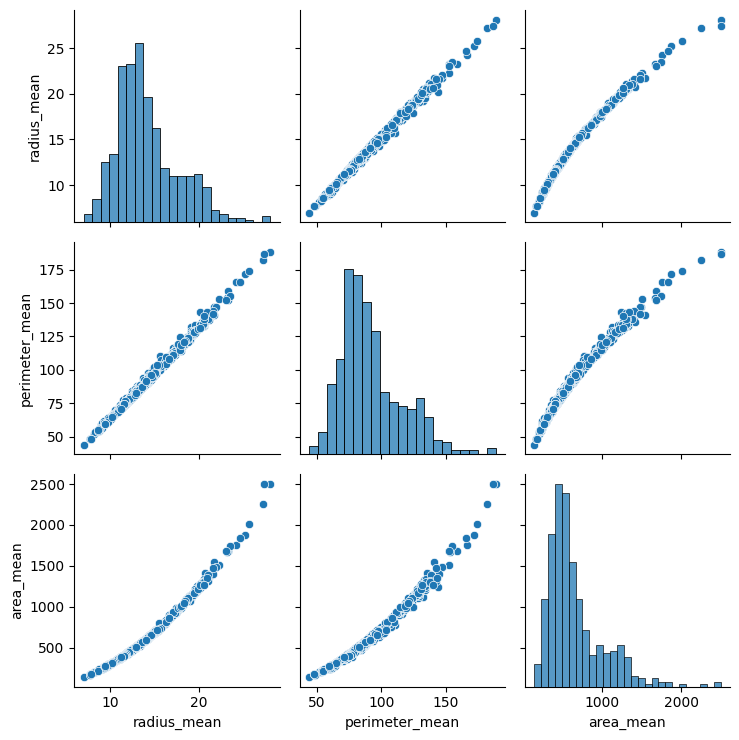

In [1006]:
# Creando scatter plots: 'radius_mean','perimeter_mean','area_mean
ax = sns.pairplot(data=data_df[['radius_mean','perimeter_mean','area_mean']])
plt.tight_layout()

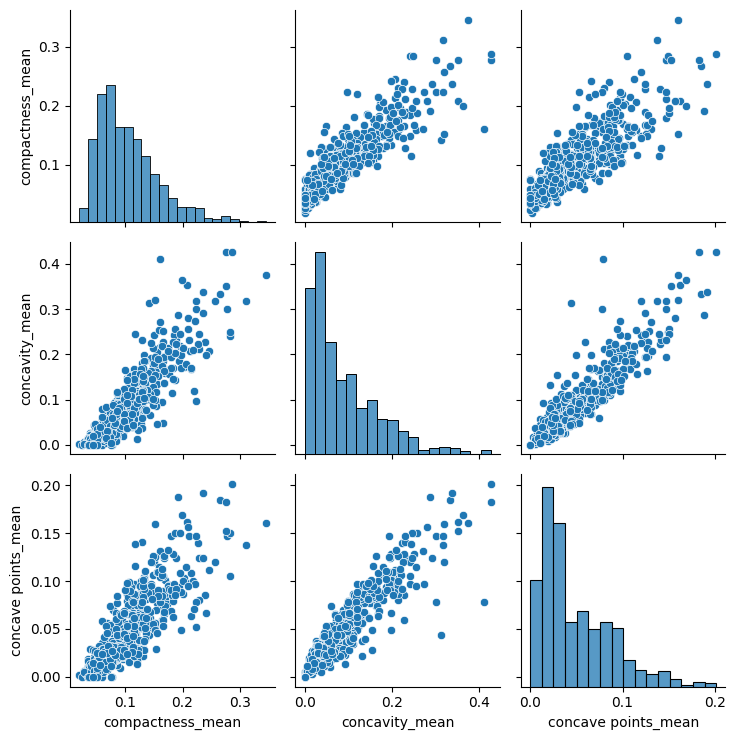

In [1007]:
# Creando scatter plots: 'compactness_mean','concavity_mean','concave points_mean'
ax = sns.pairplot(data=data_df[['compactness_mean','concavity_mean','concave points_mean']])
plt.tight_layout()

3c) Elabora otro mapa de calor confirmar con los valores de correlación.


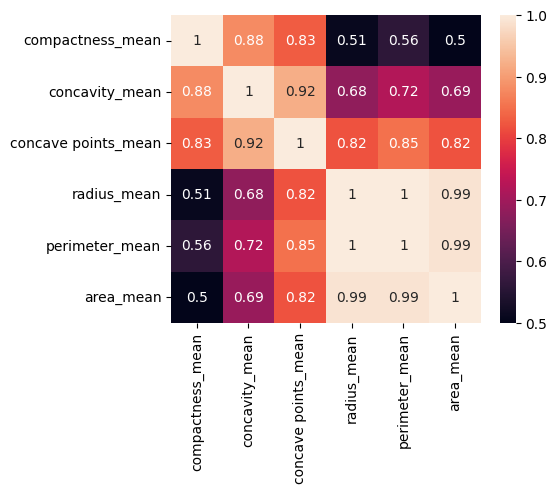

In [1008]:
# Creando un data frame con las columnas a analizar
cols_to_analize = ['compactness_mean','concavity_mean','concave points_mean','radius_mean','perimeter_mean','area_mean']
df_heatmap = data_df[cols_to_analize]

# Creando mapa de calor 
fig = plt.figure(figsize=(5,4))
corr_map = round(df_heatmap.corr(numeric_only=True), 2)
ax = sns.heatmap(corr_map, annot=True)

3d) Después de observar los valores, nos quedaremos con sólo una variable de cada trío: `radius_mean` y `compactness_mean`. Elimina las restantes, no sólo del conjunto `_mean`, sino también de `_se`. 

In [1009]:
# Eliminando las columnas tanto del conjunto de "_mean" y "_se" y colocando el resultado en un nuevo data frame
data_df_2 = data_df.drop(["perimeter_mean", "area_mean", "concavity_mean", "concave points_mean"], axis=1)
data_df_2.drop(["perimeter_se", "area_se", "concavity_se", "concave points_se"], axis=1, inplace=True)
data_df_2.drop(["diagnosis"], axis=True, inplace=True)
data_df_2

,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,fractal_dimension_se
id,,,,,,,,,,,,
842302,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.03003,0.006193
842517,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01389,0.003532
84300903,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02250,0.004571
84348301,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05963,0.009208
84358402,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.01756,0.005115
...,...,...,...,...,...,...,...,...,...,...,...,...
926424,21.56,22.39,0.11100,0.11590,0.1726,0.05623,1.1760,1.2560,0.010300,0.02891,0.01114,0.004239
926682,20.13,28.25,0.09780,0.10340,0.1752,0.05533,0.7655,2.4630,0.005769,0.02423,0.01898,0.002498
926954,16.60,28.08,0.08455,0.10230,0.1590,0.05648,0.4564,1.0750,0.005903,0.03731,0.01318,0.003892


Observa la distribución de las variables resultantes (deben ser 12): 

4a) Utilizando histogramas. Guarda en una variable (`skew_cols`) las que tengan marcado sesgo positivo. Para dar seguridad a tu selección, elige aquellas cuyo resultado de aplicar la función `skew()` sea mayor a 1. 

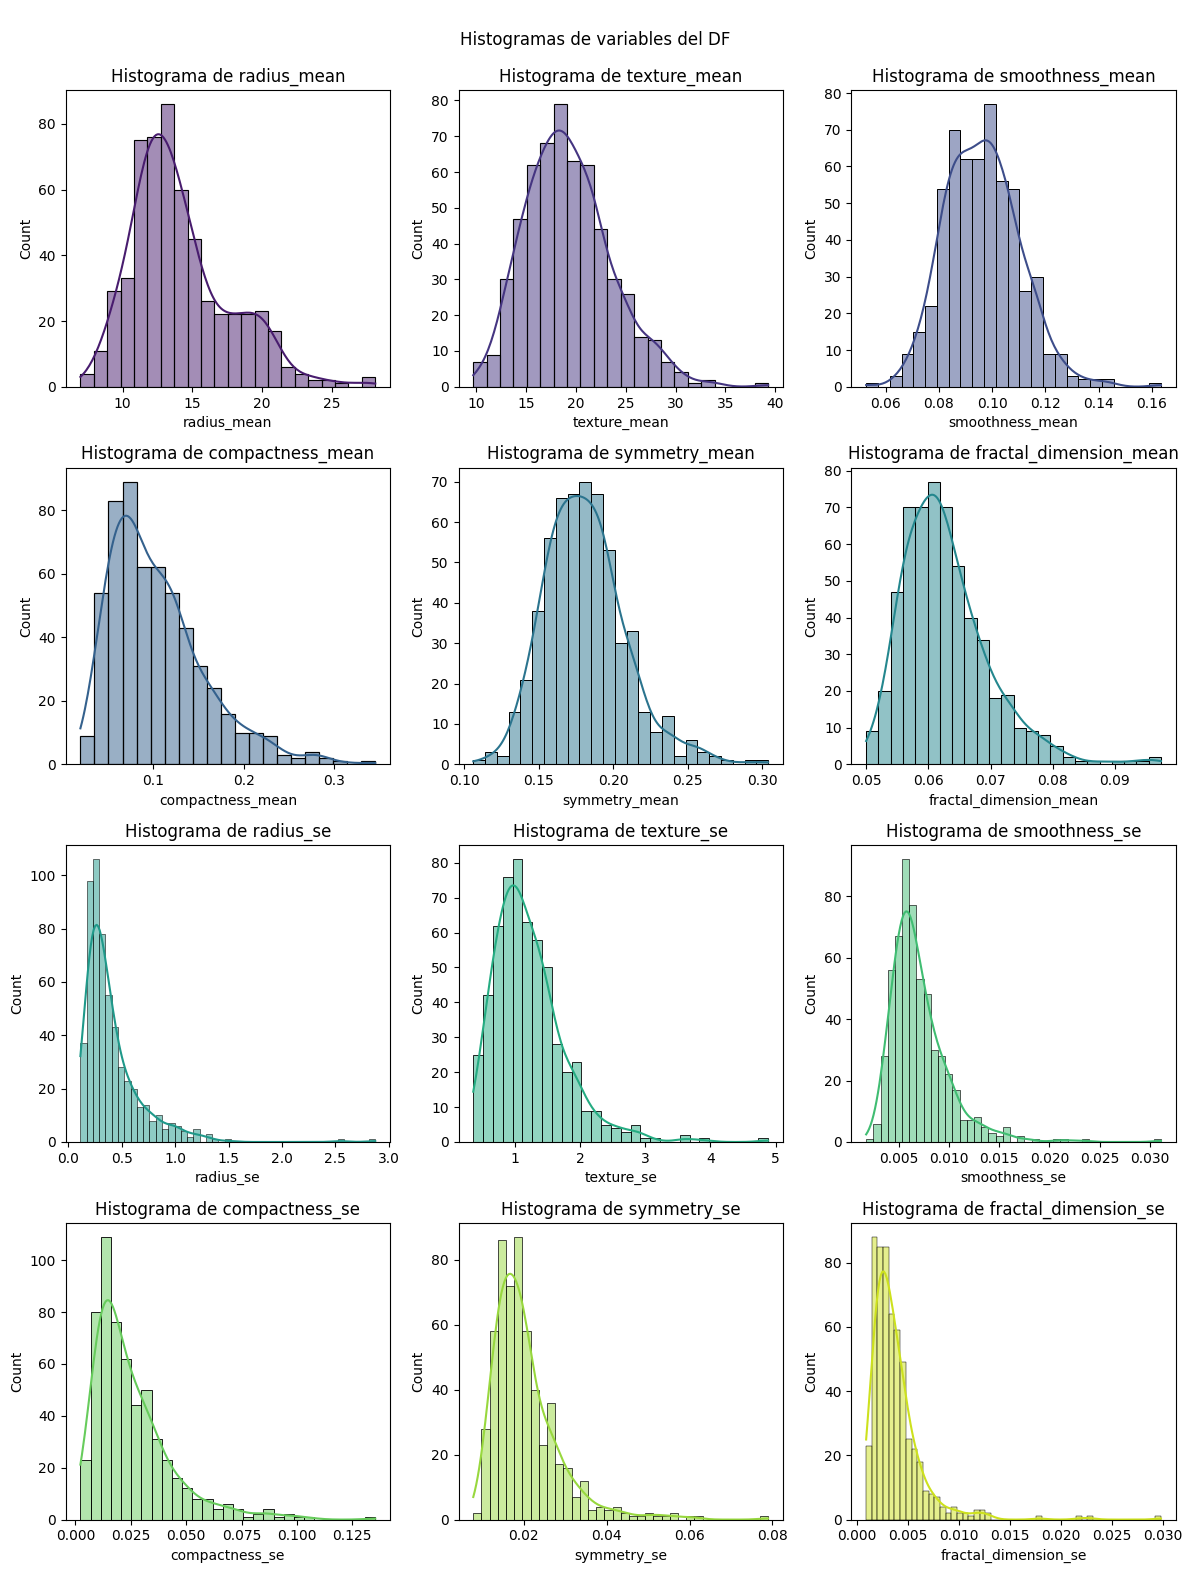

In [1010]:
from scipy.stats import skew 

skew_dic = dict()

fig, axes = plt.subplots(4,3, figsize=(12,16))
axes = axes.ravel()
colors = sns.color_palette("viridis", len(data_df_2.columns))

# Graficando histogramas por cada variable del data frame
for col, ax, color in zip(data_df_2, axes, colors):
    
    # Realiza el histograma y coloca el título del gráfico
    ax = sns.histplot(data=data_df_2, x=col, ax=ax, color=color, kde=True)
    ax.set_title(f'Histograma de {col}')
    
    # Guarda el skew del histograma en el diccionario
    skew_dic[col] = float(round(skew(data_df_2[col]), 4))
    
fig.suptitle("\nHistogramas de variables del DF\n")
fig.tight_layout()

In [1011]:
# Convertir diccionario de skew en data frame para visualización
skew_df = pd.DataFrame(skew_dic, index=["Skew"]).T
display(skew_df)

# Data frame 
skew_cols = skew_df[skew_df["Skew"] > 1].T.columns.to_list()
print("Total de columnas:", len(skew_cols))
print("Las columnas con sego positivo son las siguientes:")
skew_cols

,Skew
radius_mean,0.9399
texture_mean,0.6487
smoothness_mean,0.4551
compactness_mean,1.1870
symmetry_mean,0.7237
fractal_dimension_mean,1.3010
radius_se,3.0805
texture_se,1.6421
smoothness_se,2.3083
compactness_se,1.8972


Total de columnas: 8
Las columnas con sego positivo son las siguientes:


['compactness_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'smoothness_se',
 'compactness_se',
 'symmetry_se',
 'fractal_dimension_se']

4b) Dibujando box plots de todas las variables. Guarda en una variable (`scale_cols`) aquellas que no se encuentren en el intervalo [0,1]


Columnas a escalar (scale_cols):
['radius_mean', 'texture_mean', 'radius_se', 'texture_se']


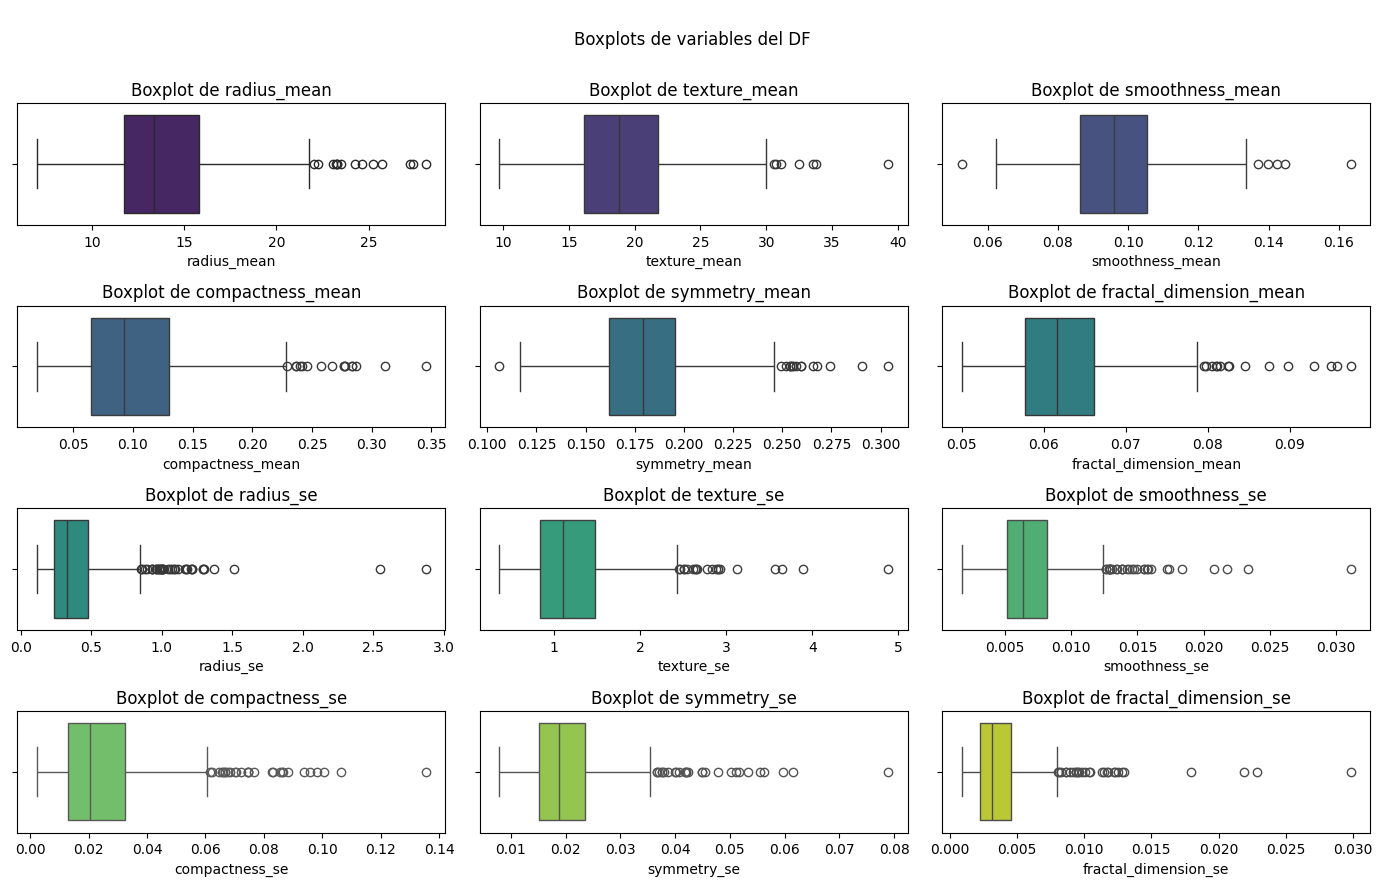

In [1012]:
from scipy.stats import skew 

scale_cols = list()

fig, axes = plt.subplots(4,3, figsize=(14,9))
axes = axes.ravel()
colors = sns.color_palette("viridis", len(data_df_2.columns))

# Graficando histogramas por cada variable del data frame
for col, ax, color in zip(data_df_2, axes, colors):
    
    # Realiza el histograma y coloca el título del gráfico
    ax = sns.boxplot(data=data_df_2, x=col, ax=ax, color=color)
    ax.set_title(f'Boxplot de {col}')
    
    scale = max(data_df_2[col]) - min(data_df_2[col])
    if scale > 1:
        scale_cols.append(col)
    elif (min(data_df_2[col]) < 0 and max(data_df_2[col]) > 1):
        scale_cols.append(col)
        
print("Columnas a escalar (scale_cols):")
print(scale_cols)
    
fig.suptitle("\nBoxplots de variables del DF\n")
fig.tight_layout()

Con todo el análisis anterior, estamos listos para generar un modelo *baseline* denominado `logr_model`. Para ello:

5a) Vuelve a leer el contenido del archivo, haz que el `id` sea el índice y separa las variables del dataframe: en `X` coloca los predictores y en `y` la variable de respuesta o salida (`diagnosis`). Divide el conjunto en entrenamiento y prueba (80:20) considerando el parámetro `random_state` con el valor de 1.

In [1013]:
# Leyendo el contenido del archivo nuevamente
df = pd.read_csv("data.csv").set_index("id")
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [1014]:
from sklearn.model_selection import train_test_split 

X = df.drop("diagnosis", axis=1)   # Predictores numéricos
y = df["diagnosis"]         # Variable de salida

# Separación de los datos en datos de entrenamiento y datos de prueba
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8, random_state=1)
display(Xtrain)
display(Xtest)
display(ytrain)
display(ytest)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
90524101,17.99,20.66,117.80,991.7,0.10360,0.13040,0.120100,0.088240,0.1992,0.06069,...,21.080,25.41,138.10,1349.0,0.14820,0.37350,0.33010,0.19740,0.3060,0.08503
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
89346,9.00,14.40,56.36,246.3,0.07005,0.03116,0.003681,0.003472,0.1788,0.06833,...,9.699,20.07,60.90,285.5,0.09861,0.05232,0.01472,0.01389,0.2991,0.07804
902975,12.21,14.09,78.78,462.0,0.08108,0.07823,0.068390,0.025340,0.1646,0.06154,...,13.130,19.29,87.65,529.9,0.10260,0.24310,0.30760,0.09140,0.2677,0.08824
904969,12.34,14.95,78.29,469.1,0.08682,0.04571,0.021090,0.020540,0.1571,0.05708,...,13.180,16.85,84.11,533.1,0.10480,0.06744,0.04921,0.04793,0.2298,0.05974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866674,19.79,25.12,130.40,1192.0,0.10150,0.15890,0.254500,0.114900,0.2202,0.06113,...,22.630,33.58,148.70,1589.0,0.12750,0.38610,0.56730,0.17320,0.3305,0.08465
869254,10.75,14.97,68.26,355.3,0.07793,0.05139,0.022510,0.007875,0.1399,0.05688,...,11.950,20.72,77.79,441.2,0.10760,0.12230,0.09755,0.03413,0.2300,0.06769
859717,17.20,24.52,114.20,929.4,0.10710,0.18300,0.169200,0.079440,0.1927,0.06487,...,23.320,33.82,151.60,1681.0,0.15850,0.73940,0.65660,0.18990,0.3313,0.13390


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
906564,14.690,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.063000,0.2086,0.07406,...,16.46,18.34,114.10,809.2,0.1312,0.36350,0.32190,0.11080,0.2827,0.09208
85715,13.170,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.073400,0.2128,0.06777,...,15.67,27.95,102.80,759.4,0.1786,0.41660,0.50060,0.20880,0.3900,0.11790
891670,12.950,16.02,83.14,513.7,0.10050,0.07943,0.06155,0.033700,0.1730,0.06470,...,13.74,19.93,88.81,585.4,0.1483,0.20680,0.22410,0.10560,0.3380,0.09584
874217,18.310,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.058140,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.1234,0.24450,0.35380,0.15710,0.3206,0.06938
905680,15.130,29.81,96.71,719.5,0.08320,0.04605,0.04686,0.027390,0.1852,0.05294,...,17.26,36.91,110.10,931.4,0.1148,0.09866,0.15470,0.06575,0.3233,0.06165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87164,15.460,11.89,102.50,736.9,0.12570,0.15550,0.20320,0.109700,0.1966,0.07069,...,18.79,17.04,125.00,1102.0,0.1531,0.35830,0.58300,0.18270,0.3216,0.10100
84348301,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.105200,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.86630,0.68690,0.25750,0.6638,0.17300
859471,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.043750,0.2111,0.08046,...,10.31,22.65,65.50,324.7,0.1482,0.43650,1.25200,0.17500,0.4228,0.11750


id
90524101    M
84358402    M
89346       B
902975      B
904969      B
           ..
866674      M
869254      B
859717      M
88249602    B
854941      B
Name: diagnosis, Length: 455, dtype: object

id
906564      B
85715       M
891670      B
874217      M
905680      M
           ..
87164       M
84348301    M
859471      B
911150      B
90944601    B
Name: diagnosis, Length: 114, dtype: object

5b) Prepara un transformador, denominado `preprocessing`, para borrar las columnas altamente correlacionadas (las 18 variables que se determinaron en los ejercicios previos) Asegúrate de incluir el parámetro `remainder='passthrough'` para mantener el resto de las variables.

In [1015]:
from sklearn.compose import make_column_transformer, make_column_selector

# Cols to erase
# ['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
cols_to_erase = [col for col in X.columns if col not in data_df_2.columns]
print("Cantidad de columnas a eliminar:", len(cols_to_erase))
print("Columnas a eliminar:\n-", '\n- '.join(cols_to_erase))

# Realizando un transformador que elimine todas las columnas anteriormente analizadas
preprocessing = make_column_transformer(
    ("drop", cols_to_erase),
    remainder="passthrough"
)

preprocessed_res = preprocessing.fit_transform(X)
preprocessed_res_df = pd.DataFrame(preprocessed_res, columns=preprocessing.get_feature_names_out())
preprocessed_res_df

Cantidad de columnas a eliminar: 18
Columnas a eliminar:
- perimeter_mean
- area_mean
- concavity_mean
- concave points_mean
- perimeter_se
- area_se
- concavity_se
- concave points_se
- radius_worst
- texture_worst
- perimeter_worst
- area_worst
- smoothness_worst
- compactness_worst
- concavity_worst
- concave points_worst
- symmetry_worst
- fractal_dimension_worst


,remainder__radius_mean,remainder__texture_mean,remainder__smoothness_mean,remainder__compactness_mean,remainder__symmetry_mean,remainder__fractal_dimension_mean,remainder__radius_se,remainder__texture_se,remainder__smoothness_se,remainder__compactness_se,remainder__symmetry_se,remainder__fractal_dimension_se
0,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.03003,0.006193
1,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01389,0.003532
2,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02250,0.004571
3,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05963,0.009208
4,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.01756,0.005115
...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,0.11100,0.11590,0.1726,0.05623,1.1760,1.2560,0.010300,0.02891,0.01114,0.004239
565,20.13,28.25,0.09780,0.10340,0.1752,0.05533,0.7655,2.4630,0.005769,0.02423,0.01898,0.002498
566,16.60,28.08,0.08455,0.10230,0.1590,0.05648,0.4564,1.0750,0.005903,0.03731,0.01318,0.003892
567,20.60,29.33,0.11780,0.27700,0.2397,0.07016,0.7260,1.5950,0.006522,0.06158,0.02324,0.006185


5c) Entrena el modelo `logr_model` con el transformador `preprocessing` y  regresión logística. 

Como la salida `y` está en términos de las etiquetas `'B'` y `'M'`, en lugar de 0 y 1, para evaluar el modelo en el conjunto de prueba deberás especificar la clase positiva. En el caso de la matriz de confusión, indica el orden de las etiquetas con `labels=['B','M']`, porque `'B'` es la clase negativa (ésta se especifica primero) y `'M'` la positiva. Para las métricas de *recall* y *precision*, utiliza el parámetro `pos_label='M'`. Como *accuracy* ocupa la suma de ambas clases y el total de las observaciones, no requiere ninguna especificación. Si quisieras omitir estos parámetros, tendrías que sustituir `'B'` por 0 y `'M'` por 1, previo a la construcción del modelo. 

### **Creación del modelo**

In [1016]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, accuracy_score

# Describiendo el pipeline
logr_model = make_pipeline(
    preprocessing,
    LogisticRegression()
)

### **Modelo con data frame normal**

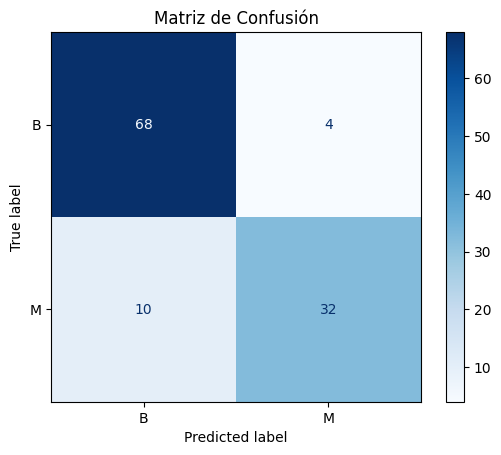

Precision (Positiva=M): 0.8888888888888888
Recall (Positiva=M): 0.7619047619047619
Accuracy: 0.8771929824561403


In [1017]:
# Entrenando el modelo
logr_model.fit(Xtrain, ytrain)

# Realizando predicciones
ypred = logr_model.predict(Xtest)

# Matriz de confusión (B - Clase negativa, M - Clase positiva)
conf_matrix = confusion_matrix(ytest, ypred, labels=['B', 'M'])

# Calculo de métricas
precision = precision_score(ytest, ypred, pos_label='M')
recall = recall_score(ytest, ypred, pos_label='M')
accuracy = accuracy_score(ytest, ypred)

# Imprimiendo metricas
matrix = ConfusionMatrixDisplay(conf_matrix, display_labels=logr_model.classes_)
matrix.plot(cmap="Blues")  # Puedes agregar 'cmap' para cambiar los colores
plt.title("Matriz de Confusión")
plt.show()

print("Precision (Positiva=M):", precision)
print("Recall (Positiva=M):", recall)
print("Accuracy:", accuracy)

### **Modelo reemplazando la columna diagnosis por valores numéricos**

In [1018]:
# Reemplazando los "B" por 0 y "M" por 1 en los data frames de entrenamiento y de test
ytrain_num = ytrain.replace({'B': 0, 'M': 1})
ytest_num = ytest.replace({'B': 0, 'M': 1})
#display(ytrain_num, ytest_num)

C:\Users\amcr0\AppData\Local\Temp\ipykernel_41904\2114245652.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ytrain_num = ytrain.replace({'B': 0, 'M': 1})
C:\Users\amcr0\AppData\Local\Temp\ipykernel_41904\2114245652.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ytest_num = ytest.replace({'B': 0, 'M': 1})


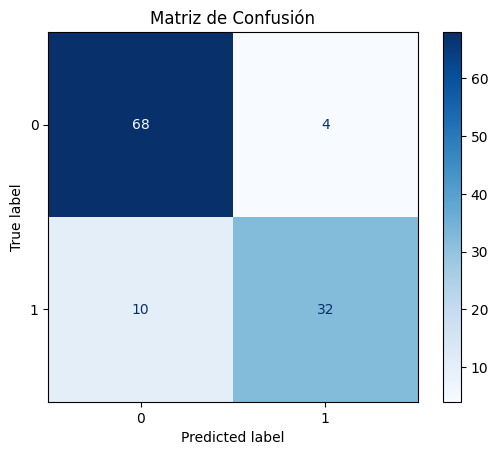

Precision (Positiva=M): 0.8888888888888888
Recall (Positiva=M): 0.7619047619047619
Accuracy: 0.8771929824561403


In [1019]:
# Entrenando el modelo
logr_model.fit(Xtrain, ytrain_num)

# Realizando predicciones
ypred_num = logr_model.predict(Xtest)

# Calculo de métricas
precision_num = precision_score(ytest_num, ypred_num)
recall_num = recall_score(ytest_num, ypred_num)
accuracy_num = accuracy_score(ytest_num, ypred_num)

# Matriz de confusión (B - Clase negativa, M - Clase positiva)
conf_matrix_num = confusion_matrix(ytest_num, ypred_num)

# Imprimiendo metricas
matrix = ConfusionMatrixDisplay(conf_matrix_num, display_labels=logr_model.classes_)
matrix.plot(cmap="Blues")  # Puedes agregar 'cmap' para cambiar los colores
plt.title("Matriz de Confusión")
plt.show()

# Imprimiendo metricas
print("Precision (Positiva=M):", precision_num)
print("Recall (Positiva=M):", recall_num)
print("Accuracy:", accuracy_num)

Para generar un modelo `logr_model2` con transformación y escalamiento:

6a) Modifica el transformador anterior para, además del borrado de las columnas correlacionadas, aplicar la raíz cuadrada a los predictores con sesgo (previamente almacenados en `skew_cols`) y escalamiento *MinMax* a los predictores con escala mayor a 1 (previamente almacenados en `scale_cols`) Como no todos los predictores serán eliminados o transformados, asegúrate de incluir el parámetro `remainder='passthrough'` 

In [1020]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer, make_column_selector

print("Columnas a borrar (cols_to_erase):", cols_to_erase)
print("Columnas a transformar (skew_cols):", skew_cols)
print("Columnas a escalar (scale_cols):", scale_cols)

# Realizando un transformador que elimine todas las columnas anteriormente analizadas
preprocessing_2 = ColumnTransformer(transformers=[
    ("drop_columns","drop", cols_to_erase),
    ("sqrt_transform", FunctionTransformer(func=np.sqrt), skew_cols),
    ("MinMax_scaler", MinMaxScaler(), scale_cols),
    ],
    remainder="passthrough"
)

# Describiendo el pipeline
logr_model2 = Pipeline([
    ("preprocessing", preprocessing_2),
    ("algoritmo",LogisticRegression()),
])

Columnas a borrar (cols_to_erase): ['perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'perimeter_se', 'area_se', 'concavity_se', 'concave points_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
Columnas a transformar (skew_cols): ['compactness_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se', 'compactness_se', 'symmetry_se', 'fractal_dimension_se']
Columnas a escalar (scale_cols): ['radius_mean', 'texture_mean', 'radius_se', 'texture_se']


6b) Entrena el modelo `logr_model2` con regresión logística, aplicando previamente el transformador modificado. Evalúa el modelo en el conjunto de prueba con las mismas métricas.

### **Modelo con data frame normal**

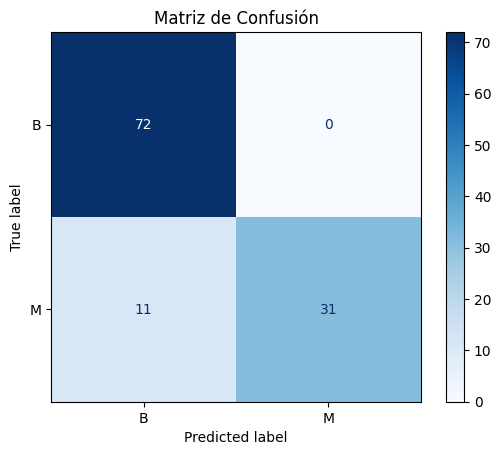

Precision (Positiva=M): 1.0
Recall (Positiva=M): 0.7380952380952381
Accuracy: 0.9035087719298246


In [1021]:
# Entrenando el modelo
logr_model2.fit(Xtrain, ytrain)

# Realizando predicciones
ypred_2 = logr_model2.predict(Xtest)

# Matriz de confusión (B - Clase negativa, M - Clase positiva)
conf_matrix_2 = confusion_matrix(ytest, ypred_2, labels=['B', 'M'])

# Calculo de métricas
precision_2 = precision_score(ytest, ypred_2, pos_label='M')
recall_2 = recall_score(ytest, ypred_2, pos_label='M')
accuracy_2 = accuracy_score(ytest, ypred_2)

# Imprimiendo metricas
matrix = ConfusionMatrixDisplay(conf_matrix_2, display_labels=logr_model2.classes_)
matrix.plot(cmap="Blues")  # Puedes agregar 'cmap' para cambiar los colores
plt.title("Matriz de Confusión")
plt.show()

# Imprimiendo metricas
print("Precision (Positiva=M):", precision_2)
print("Recall (Positiva=M):", recall_2)
print("Accuracy:", accuracy_2)

### **Modelo reemplazando la columna diagnosis por valores numéricos**

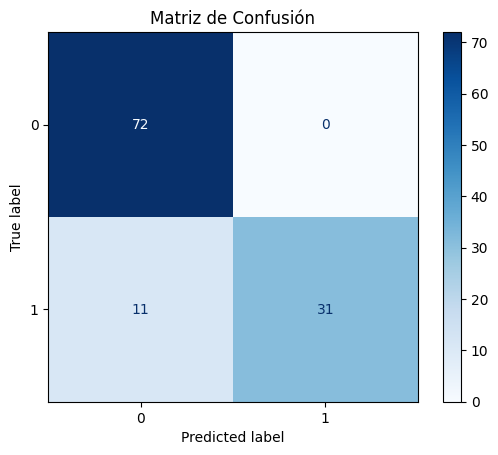

Precision (Positiva=M): 1.0
Recall (Positiva=M): 0.7380952380952381
Accuracy: 0.9035087719298246


In [1022]:
# Entrenando el modelo
logr_model2.fit(Xtrain, ytrain_num)

# Realizando predicciones
ypred_num_2 = logr_model2.predict(Xtest)

# Calculo de métricas
precision_num_2 = precision_score(ytest_num, ypred_num_2)
recall_num_2 = recall_score(ytest_num, ypred_num_2)
accuracy_num_2 = accuracy_score(ytest_num, ypred_num_2)

# Matriz de confusión (B - Clase negativa, M - Clase positiva)
conf_matrix_num_2 = confusion_matrix(ytest_num, ypred_num_2)

# Imprimiendo metricas
matrix = ConfusionMatrixDisplay(conf_matrix_num_2, display_labels=logr_model2.classes_)
matrix.plot(cmap="Blues")  # Puedes agregar 'cmap' para cambiar los colores
plt.title("Matriz de Confusión")
plt.show()

# Imprimiendo metricas
print("Precision (Positiva=M):", precision_num_2)
print("Recall (Positiva=M):", recall_num_2)
print("Accuracy:", accuracy_num_2)

# **Parte 3**. Modelo con aplicación de PCA 

7. Analizaremos el efecto de aplicar PCA a todas las variables. Recuerda que previo a aplicarlo es recomendado escalar todas las variables. Utiliza la clase `StandardScaler` para transformar `X`.

In [1023]:
from sklearn.preprocessing import StandardScaler

# Aplicando StandardScaler a todo el data frame "X" de las variables predictoras
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
X_scaled = pd.DataFrame(scaled_data, columns=scaler.get_feature_names_out())
X_scaled

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


8. Aplica PCA al conjunto escalado y determina el número de componentes que explican el 99% de la varianza. 

In [1024]:
# Aplicando PCA (Principal Component Analysis) al data frame escalado y guardando la resultante en X
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)
X_pca_df = pd.DataFrame(X_pca, columns=pca.get_feature_names_out())
X_pca_df

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,...,pca20,pca21,pca22,pca23,pca24,pca25,pca26,pca27,pca28,pca29
0,9.192837,1.948583,-1.123166,-3.633731,1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402,...,-0.096515,-0.068850,-0.084519,-0.175256,-0.151020,0.201503,-0.252585,0.033914,-0.045648,0.047169
1,2.387802,-3.768172,-0.529293,-1.118264,-0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995,...,0.077327,0.094578,0.217718,0.011290,-0.170510,0.041129,0.181270,-0.032624,0.005687,0.001868
2,5.733896,-1.075174,-0.551748,-0.912083,0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275,...,-0.311067,0.060309,0.074291,0.102762,0.171158,-0.004735,0.049569,-0.047026,-0.003146,-0.000751
3,7.122953,10.275589,-3.232790,-0.152547,2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975,...,-0.434193,0.203266,0.124105,0.153430,0.077496,0.275225,0.183462,-0.042484,0.069295,0.019937
4,3.935302,-1.948072,1.389767,-2.940639,-0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704,...,0.116545,0.017650,-0.139454,-0.005332,0.003062,-0.039254,0.032168,0.034786,-0.005038,-0.021214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,-1.177314,0.074824,-2.375193,-0.596130,-0.035471,0.987929,0.256989,...,-0.006888,0.067000,-0.088590,0.107898,0.219520,0.122900,0.159198,-0.009853,-0.007119,0.001415
565,3.793382,-3.584048,2.088476,2.506028,0.510723,-0.246710,-0.716326,-1.113360,-0.105207,-0.108632,...,0.009802,-0.019563,0.055405,0.086135,0.001197,-0.065889,-0.068512,0.023575,0.027486,0.010419
566,1.256179,-1.902297,0.562731,2.089227,-1.809991,-0.534447,-0.192758,0.341887,0.393917,0.520877,...,0.036592,-0.063352,0.200312,-0.044819,0.002429,-0.007095,-0.023691,0.002578,-0.006706,-0.003770
567,10.374794,1.672010,-1.877029,2.356031,0.033742,0.567936,0.223082,-0.280239,-0.542035,-0.089296,...,-0.140648,0.042478,-0.168820,-0.195969,0.377830,0.198192,-0.027409,0.068086,0.084163,0.023783


In [1025]:
# Impresión de estadísticas: Eigenvalues & Porcentaje de variación
eigenvalues = pd.DataFrame(pca.explained_variance_, columns=["Eigenvalues"])
var_ratio = pd.DataFrame(pca.explained_variance_ratio_,columns=["Variance Ratio"])

# Unir ambos dataframes y mostrar
display(pd.concat([eigenvalues,var_ratio], axis=1).T)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
Eigenvalues,13.304991,5.701375,2.822910,1.984128,1.651633,1.209482,0.676409,0.477456,0.417629,0.351311,...,0.030026,0.027488,0.024384,0.018087,0.015509,0.008192,0.006913,0.001592,0.000750,0.000133
Variance Ratio,0.442720,0.189712,0.093932,0.066021,0.054958,0.040245,0.022507,0.015887,0.013896,0.011690,...,0.000999,0.000915,0.000811,0.000602,0.000516,0.000273,0.000230,0.000053,0.000025,0.000004


,0,1,2,3,4,5,6,7,8,9
PCA Variance Ratio Acumulado,44.272,63.243,72.636,79.239,84.734,88.759,91.01,92.598,93.988,95.157


,10,11,12,13,14,15,16,17,18,19
PCA Variance Ratio Acumulado,96.137,97.007,97.812,98.335,98.649,98.915,99.113,99.288,99.453,99.557


,20,21,22,23,24,25,26,27,28,29
PCA Variance Ratio Acumulado,99.657,99.749,99.83,99.89,99.942,99.969,99.992,99.997,100.0,100.0


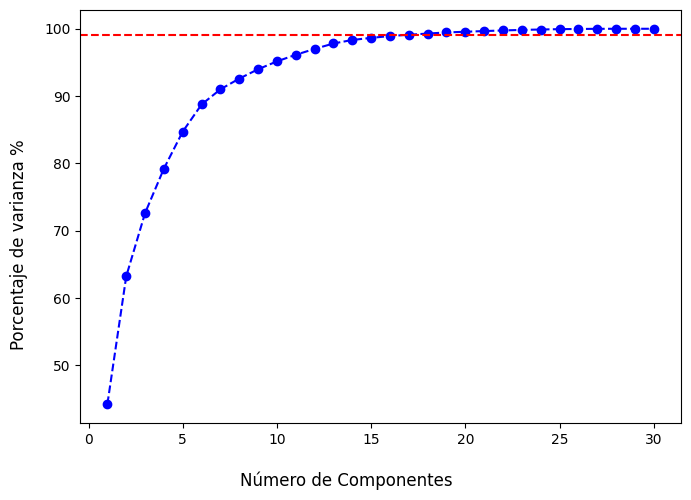

In [1026]:
# Obteniendo el porcentaje de varianza
PCA_var_ratio = pca.explained_variance_ratio_.cumsum().round(5) * 100
PCA_var_ratio_df = pd.DataFrame(PCA_var_ratio, columns=["PCA Variance Ratio Acumulado"])
display(PCA_var_ratio_df[:10].T)
display(PCA_var_ratio_df[10:20].T)
display(PCA_var_ratio_df[20:].T)

# Graficando el análisis PCA
fig = plt.figure(figsize=(7,5))
ax1 = plt.scatter(range(1, len(PCA_var_ratio) + 1), PCA_var_ratio, color='blue', label='Varianza Explicada')
ax2 = plt.plot(range(1, len(PCA_var_ratio) + 1), PCA_var_ratio, color='blue', linestyle = "dashed")
ax3 = plt.axhline(PCA_var_ratio[16], linestyle = "dashed", color="red")
fig.supylabel("Porcentaje de varianza %")
fig.supxlabel("Número de Componentes")
fig.tight_layout()

> * * *
> ### **Respuesta**
> De acuerdo al gráfico y con la tabla de porcentaje de varianza acumulada, podemos determinar que se necesita un mínimo de 17 componentes para tener una varianza del 99%
> * * * 

9. Con el número de componentes determinado, estamos listos para generar un modelo `logr_model3` con PCA. Construye un pipeline que incluya el escalamiento estándar, el PCA con el número de componentes determinado y regresión logística. Entrena el modelo utilizando el  conjunto de entrenamiento y evalúalo en el conjunto de prueba con las mismas métricas.

In [1027]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

logr_model3 = Pipeline([
    ("escalamiento", StandardScaler()),
    ("PCA",PCA(n_components=17)),
    ("algoritmo",LogisticRegression()),
])

### **Modelo con data frame normal**

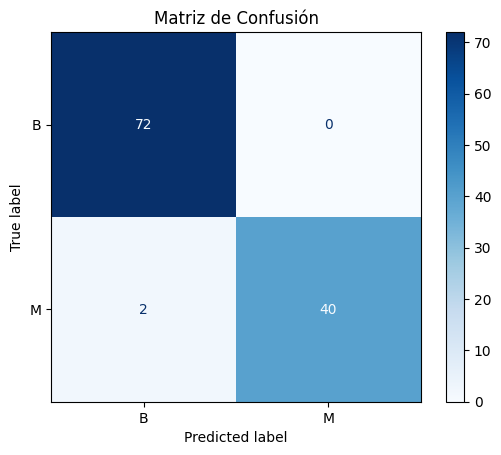

Matriz de Confusión:
 [[72  0]
 [ 2 40]]
Precision (Positiva=M): 1.0
Recall (Positiva=M): 0.9523809523809523
Accuracy: 0.9824561403508771


In [1028]:
# Entrenando el modelo
logr_model3.fit(Xtrain, ytrain)

# Realizando predicciones
ypred_3 = logr_model3.predict(Xtest)

# Matriz de confusión (B - Clase negativa, M - Clase positiva)
conf_matrix_3 = confusion_matrix(ytest, ypred_3, labels=['B', 'M'])

# Calculo de métricas
precision_3 = precision_score(ytest, ypred_3, pos_label='M')
recall_3 = recall_score(ytest, ypred_3, pos_label='M')
accuracy_3 = accuracy_score(ytest, ypred_3)

# Matriz de confusión (B - Clase negativa, M - Clase positiva)
conf_matrix_3 = confusion_matrix(ytest, ypred_3)

# Imprimiendo metricas
matrix = ConfusionMatrixDisplay(conf_matrix_3, display_labels=logr_model3.classes_)
matrix.plot(cmap="Blues")  # Puedes agregar 'cmap' para cambiar los colores
plt.title("Matriz de Confusión")
plt.show()

# Imprimiendo metricas
print("Matriz de Confusión:\n", conf_matrix_3)
print("Precision (Positiva=M):", precision_3)
print("Recall (Positiva=M):", recall_3)
print("Accuracy:", accuracy_3)

### **Modelo reemplazando la columna diagnosis por valores numéricos**

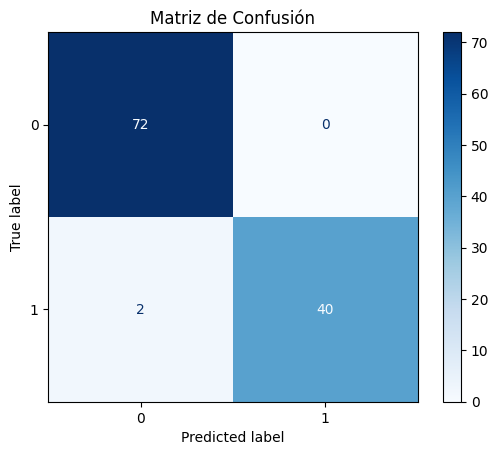

Precision (Positiva=M): 1.0
Recall (Positiva=M): 0.9523809523809523
Accuracy: 0.9824561403508771


In [1029]:
# Entrenando el modelo
logr_model3.fit(Xtrain, ytrain_num)

# Realizando predicciones
ypred_num_3 = logr_model3.predict(Xtest)

# Calculo de métricas
precision_num_3 = precision_score(ytest_num, ypred_num_3)
recall_num_3 = recall_score(ytest_num, ypred_num_3)
accuracy_num_3 = accuracy_score(ytest_num, ypred_num_3)

# Matriz de confusión (B - Clase negativa, M - Clase positiva)
conf_matrix_num_3 = confusion_matrix(ytest_num, ypred_num_3)

# Imprimiendo metricas
matrix = ConfusionMatrixDisplay(conf_matrix_num_3, display_labels=logr_model3.classes_)
matrix.plot(cmap="Blues")  # Puedes agregar 'cmap' para cambiar los colores
plt.title("Matriz de Confusión")
plt.show()

# Imprimiendo metricas
print("Precision (Positiva=M):", precision_num_3)
print("Recall (Positiva=M):", recall_num_3)
print("Accuracy:", accuracy_num_3)

10. En un modelo de diagnóstico médico, ¿cuál consideras que es la métrica más importante? ¿Cómo cambiarías (disminuir/aumentar) el *threshold*? ¿Por qué? 

> * * *
> ### **Respuesta - Métricas**
> Cada una de las métricas describe escenarios distintos y se calculan de la siguiente manera:
> * `precision`: Indica el porcentaje muestras positivas que se clasificaron correctamente del total de muestras clasificadas de manera positivas.
>   
>       tp / (tp + fp)
>
>       - tp: True Positive 
>       - fp: False Positives
>
> * `recall`: Indica el porcentaje de muestras positivas que se etiquetaron correctamente, del total de muestras reales positivas.
>   
>       tp / (tp + fn)
>
>       - tp: True Positive 
>       - fn: False Negative
>
> * `accuracy`: Indica el porcentaje de muestras que se clasificaron correctamente, sin importar si sea negativa o positiva.
>   
>       (tp + tn) / total
>
>       - tp: True Positive 
>       - tn: True Negatives
>
> En un modelo de diagnóstico médico la métrica más importante sería la de `recall` ya el recall nos dice que tanto porcentaje de nuestras predicciones son correctas conforme a la muesrtra real de los datos.
>
> Traducido al diagnostico médico, nos está indicando que estamos identificando la mayoría de las personas que padecen la enfermedad, y por ende estaríamos salvando vidas.
>
>   - **TP:** Persona que se detectó la enfermedad correctamente
>   - **FP:** Persona que se clasificó como enfermo pero no tiene la enfermedad
>   - **TN:** Persona que se detectó sin enfermedad
>   - **FN:** Persona que se clasificó enferma, pero no lo está
>
> Con este contexto es más importante detectar la enfermedad en los pacientes, es decir aumentar los índices de TP y disminuir el FN, que son los que no se les detectó la enfermedad pero si la tienen. La métrica que relaciona estas variables es `recall`, por lo que está métrica es la más importante en el contexto médico.
>
> * * * 
Conocer más en:
https://scikit-learn.org/1.5/auto_examples/model_selection/plot_precision_recall.html

> * * *
> ### **Respuesta - Treshold**
> 
> El treshold nos dice cuando clasificar una variable como positiva o negativa. Como en este caso es más importante alertar si el paciente tiene la enferemedad se debe mejorar el puntaje de la métrica `recall`. Para hacer esto, necesitamos disminuir el valor del treshold, detectando así más positivos y con una posibilidad de que incrementen los FP. 
>
> Esto puede llegar a alertar a los pacientes, pero tiene un costo menor el tener un paciente con una enfermedad falsa, a no detecar a alguien que si tenga la enfermedad.
> * * *